# Quantify block diversity

do alignment within blogs, multiple sequence alignment with Mafft, only consider longer blogs (maybe first for all blogs and then filter)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import altair as alt
from itertools import combinations
import numpy as np
import pypangraph as pp
from Bio import Phylo, SeqIO
from Bio import Align
from Bio.SeqRecord import SeqRecord
import string

from pathlib import Path
import subprocess

import scipy.cluster.hierarchy as sch

from junction_analysis.block_alignment import create_block_msas, summarize_block_msas, analyze_alignment

In [2]:
_fname = f"../config/junction_stats.csv"
jdf = pd.read_csv(_fname)
jdf

,edge,n_iso,n_blocks,has_dupl,n_categories,majority_category,singleton,cat_entropy,n_nodes,min_length,max_length,mean_length,n_all_cores,core_left_length,core_right_length,transitive,nonempty_acc_len,nonempty_freq,pangenome_len
0,HUTOPWFGVH_f__WJBYSSJHSE_f,222,5,False,3,218,False,0.100354,11,18177,18954,18190.108108,218,16280.0,1699.0,False,727.5,0.018018,1684.0
1,IZQZNHJQRQ_f__ZVPGGEJIIF_f,222,3,False,2,221,True,0.028831,5,11740,12517,11743.500000,221,1530.0,10210.0,False,777.0,0.004505,768.0
2,JNLRGIQXOF_f__YQUHGDANHE_f,222,3,False,2,221,True,0.028831,5,28035,29472,28041.472973,221,23758.0,4277.0,False,1437.0,0.004505,1433.0
3,JMOMDSHCBS_r__SPDPCYMYDN_r,222,3,False,2,220,False,0.051397,5,7366,8143,7373.000000,220,2781.0,4585.0,False,777.0,0.009009,768.0
4,JKRDVEYDGL_f__OTPJRRWJRK_f,222,3,False,2,221,True,0.028831,5,10058,48233,10229.959459,221,7295.0,2763.0,False,38175.0,0.004505,37225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,GPXHVRRZLC_f__KYQOKYBCOW_f,2,12,False,2,1,True,0.693147,18,65788,105315,85551.500000,0,18606.0,29024.0,False,34255.5,1.000000,100857.0
544,EOBHADSLFU_f__SKPHAXSFLS_r,2,1,False,1,2,False,0.000000,1,7231,7231,7231.000000,2,7231.0,7231.0,True,NaN,0.000000,3298.0
545,XXIWNZXZTK_f__ZLAJFQLBFQ_r,2,3,False,2,1,True,0.693147,6,83630,83630,83630.000000,2,31644.0,48921.0,False,NaN,0.000000,73408.0
546,YUOECYBHUS_f__ZTHKZYHPIX_f,2,20,True,2,1,True,0.693147,35,66710,186048,126379.000000,0,60232.0,5710.0,False,60437.0,1.000000,160404.0


# runs very long (5 hours maybe)
junction_list = list(jdf.edge)
leftover_junctions = list(jdf.edge)[447:]

for junction_name in leftover_junctions:
    print("Processing junction:", junction_name)
    create_block_msas(junction_name)

In [3]:
# TODO: how do I handle overhangs on the side for calculating distance against consensus / pairwise distance
for junction_name in list(jdf.edge):
    print("Processing junction:", junction_name)
    summarize_block_msas(junction_name)

# 1 min 30s
# 27 min

Processing junction: HUTOPWFGVH_f__WJBYSSJHSE_f
Processing junction: IZQZNHJQRQ_f__ZVPGGEJIIF_f
Processing junction: JNLRGIQXOF_f__YQUHGDANHE_f
Processing junction: JMOMDSHCBS_r__SPDPCYMYDN_r
Processing junction: JKRDVEYDGL_f__OTPJRRWJRK_f
Processing junction: JJRRWBDVGH_f__TFKJQKVUKX_f
Processing junction: JJDDCMJGQE_r__ZUHGCANVTN_r
Processing junction: JJDDCMJGQE_f__PJYKOTQZCQ_f
Processing junction: JHJVGMLICW_f__QHIDYNXVPV_f
Processing junction: JFSHRUDEUI_r__YWYSIZWCPS_r
Processing junction: JFSHRUDEUI_f__KKOJCLVXES_f
Processing junction: JDUTVQBTFB_r__OPCCUBTDFQ_r
Processing junction: JDUTVQBTFB_f__YOJVMARYCH_f
Processing junction: JDTWTXSWTH_f__UMJDNWQKXC_f
Processing junction: IZQZNHJQRQ_r__YPDDEPKACD_r
Processing junction: IZPPAJHCDB_r__YBWQKVQGZE_r
Processing junction: JPYVXRYZLU_f__UUBXUCAQCF_f
Processing junction: IZPPAJHCDB_f__OOKLAQXFLW_f
Processing junction: IZBZUHLGQE_r__XIDWLBCHGM_r
Processing junction: IZBYPELCGF_r__RVYEEDGLQI_r
Processing junction: IZBYPELCGF_f__YNTFB

In [ ]:
example_junction = "RYYAQMEJGY_r__ZTHKZYHPIX_f"
example_pangraph = pp.Pangraph.from_json(f"../results/junction_pangraphs/{example_junction}.json")
summary_df = pd.read_csv(f"../results/block_alignments/{example_junction}_alignment_stats.csv")


In [6]:
summary_df

,file,block_id,n_seqs,alignment_len,core_len,left_overhang,right_overhang,mismatch_columns,mismatch_fraction
0,block_122115647818668942_aln.fa,122115647818668942,214,2709,2709,0,0,77,0.028424
1,block_139818706072034984_aln.fa,139818706072034984,141,1442,1430,12,0,2,0.001399
2,block_414568899235367829_aln.fa,414568899235367829,1,332,332,0,0,0,0.000000
3,block_441542311555414356_aln.fa,441542311555414356,140,868,843,17,8,4,0.004745
4,block_510116479221794419_aln.fa,510116479221794419,199,825,688,0,137,104,0.151163
...,...,...,...,...,...,...,...,...,...
172,block_17885250183886920782_aln.fa,17885250183886920782,14,103,103,0,0,6,0.058252
173,block_17897566196295069196_aln.fa,17897566196295069196,182,1320,1320,0,0,0,0.000000
174,block_18081619434129753211_aln.fa,18081619434129753211,191,380,230,89,61,36,0.156522
175,block_18146406109094649449_aln.fa,18146406109094649449,216,5717,5704,4,9,406,0.071178


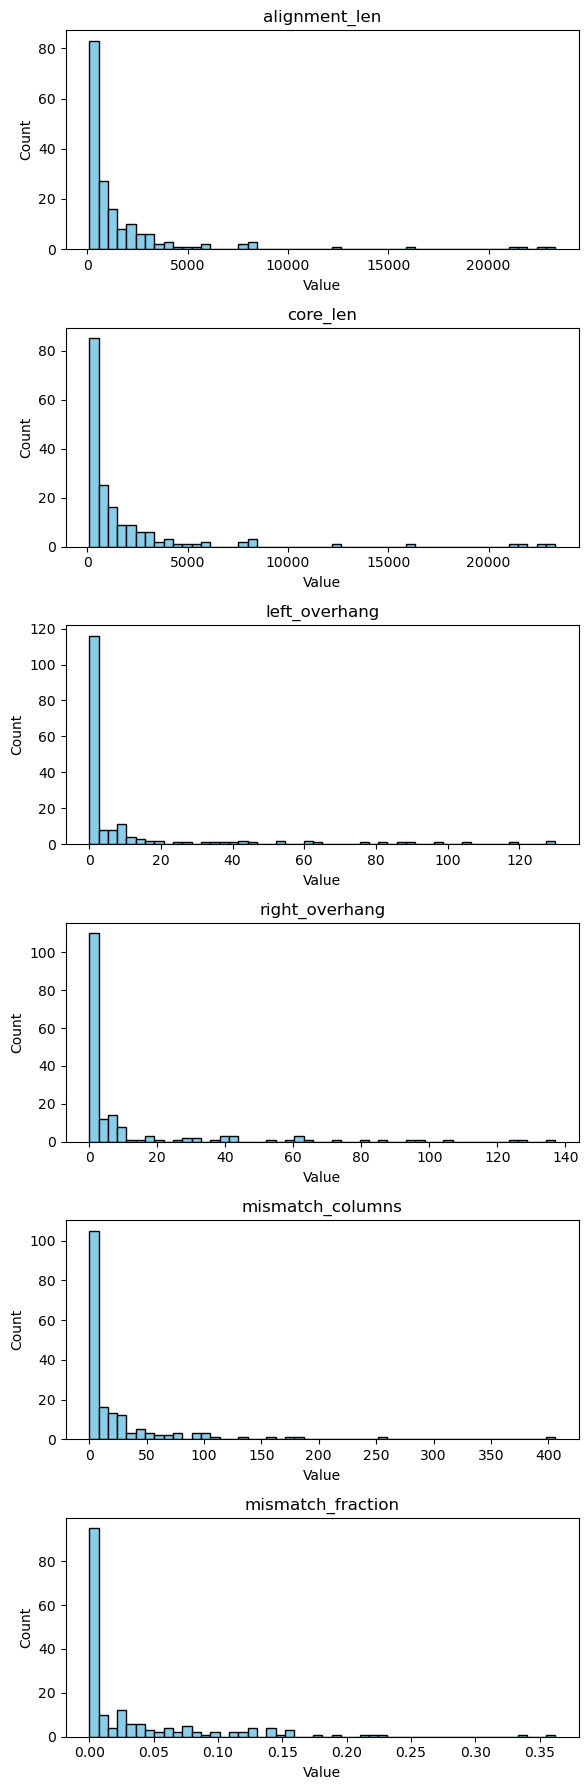

In [59]:
def plot_histograms(df, columns, bins=30):
    """
    Plot histograms for the given columns of a DataFrame as subplots.
    """
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(6, 3*n))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, columns):
        df[col].plot(kind='hist', bins=bins, ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

len_filtered_df = summary_df[summary_df['core_len'] >= 500]

plot_histograms(summary_df, ['alignment_len', 'core_len', 'left_overhang', 'right_overhang', 'mismatch_columns', 'mismatch_fraction'], bins = 50)


In [ ]:
# expected distance between sequences
# maybe consider substitutions along tree